# Field cage plant and locust post modeling visualization

Now we combined the plant nutrient and locust intake target model estimates and raw datan together for manuscript figure and table construction

We will save the figures as png and save tables as csvs


In [3]:
load_packages <- function(packages) {
  # Check for uninstalled packages
  uninstalled <- packages[!packages %in% installed.packages()[,"Package"]]
  
  # Install uninstalled packages
  if(length(uninstalled)) install.packages(uninstalled, dependencies = TRUE)

  # Load all packages
  for (pkg in packages) {
    if (!require(pkg, character.only = TRUE, quietly = TRUE)) {
      message(paste("Failed to load package:", pkg))
    }
  }
}

# List of packages to check, install, and load
packages <- c("tidyverse", "mgcv","gratia", 
              "ggpubr", "patchwork", "broom", "knitr", "janitor", 
              "here","ggpubr","MetBrewer","GGally","patchwork")

load_packages(packages)

i_am('README.md')

# Setting R options for jupyterlab
options(repr.plot.width = 10, repr.plot.height = 10)


here() starts at /home/datascience/herbivore_nutrient_interactions



# Section 1 - maintext figures and tables

## Figure - overall field cage results

- plant nutrient change


In [50]:
plant_nutrients_model_estimates <- read_csv(here('data/processed/field_cage_experiment/plant_nutrient_predictions.csv'),show_col_types = FALSE)
plant_nutrients <- read_csv(here('data/processed/field_cage_experiment/plant_nutrient_raw_data.csv'),show_col_types = FALSE)

combined_plant_dat <- plant_nutrients |>
    dplyr::select(treatment,protein_mg_mg,carb_mg_mg,date) |>
    left_join(plant_nutrients_model_estimates,by=c('treatment','date'))

- locust physiology

In [51]:
locust_prop_dat <- read_csv(here("data/raw/field_cage_experiment/adult_locust_proportion_survival_by_treatment.csv"),show_col_types = FALSE)

locust_mass_dat <- read_csv(here("data/raw/field_cage_experiment/adult_locust_final_mass_by_treatment.csv"),show_col_types = FALSE)

now creating the figures

In [52]:
plant_nutrients_through_time_plot <- combined_plant_dat |>
    mutate(treatment = factor(treatment,levels=c('None','Medium','High'))) |> 
    ggplot(aes(x=protein_mg_mg,y=carb_mg_mg, fill = treatment)) +
        geom_point(shape=21) +
        geom_point(aes(y=pred_carb,x=pred_protein,color = treatment),size=5,shape=21) +
        coord_equal(ratio=1) + 
        facet_wrap(~date) +
        xlim(0,0.3) + ylim(0,0.3) + 
        theme_pubr() + 
        ylab("Carbohydrate (mg/mg)") +
        xlab("Protein (mg/mg)") + 
        geom_abline(slope = 1,linetype=1,intercept=0) + 
        geom_abline(slope = 2,linetype=2,intercept=0) +
        scale_fill_manual(values = c('#74c476','#238b45','#00441b'))  +
        scale_color_manual(values = c('#74c476','#238b45','#00441b'))




In [53]:
locust_final_mass_plot <- locust_mass_dat |>
    drop_na() |>
    group_by(treatment) |>
    mutate(mean_mass = mean(mass_g)) |>
    ggplot(aes(x=treatment,y=mass_g,color=sex)) +
        geom_jitter(height=0,width=0.3) +
        geom_point(aes(y=mean_mass),color='black',size=2) +
        theme_pubr() +
        scale_color_manual(values = c('#1b9e77','#d95f02')) +
        ylab('mass (g)') +
        xlab('treatment')

adult_prop_figure <- locust_prop_dat |>
    drop_na() |>
    ggplot(aes(x=treatment,y=adult_proportion)) +
        geom_boxplot(outlier.size=-1) +
        geom_jitter(height=0,width=0.3) +
        #geom_point(aes(y=mean_adult),color='black',size=10) +
        theme_pubr() +
        xlab('adult proportion') +
        xlab('treatment') +
        ylim(0,1)


survival_prop_figure <- locust_prop_dat |>
    drop_na() |>
    ggplot(aes(x=treatment,y=survive_proportion)) +
        geom_boxplot(outlier.size=-1) +
        geom_jitter(height=0,width=0.3) +
        #geom_point(aes(y=mean_adult),color='black',size=10) +
        theme_pubr() +
        xlab('survival proportion') +
        xlab('treatment') +
        ylim(0,1)

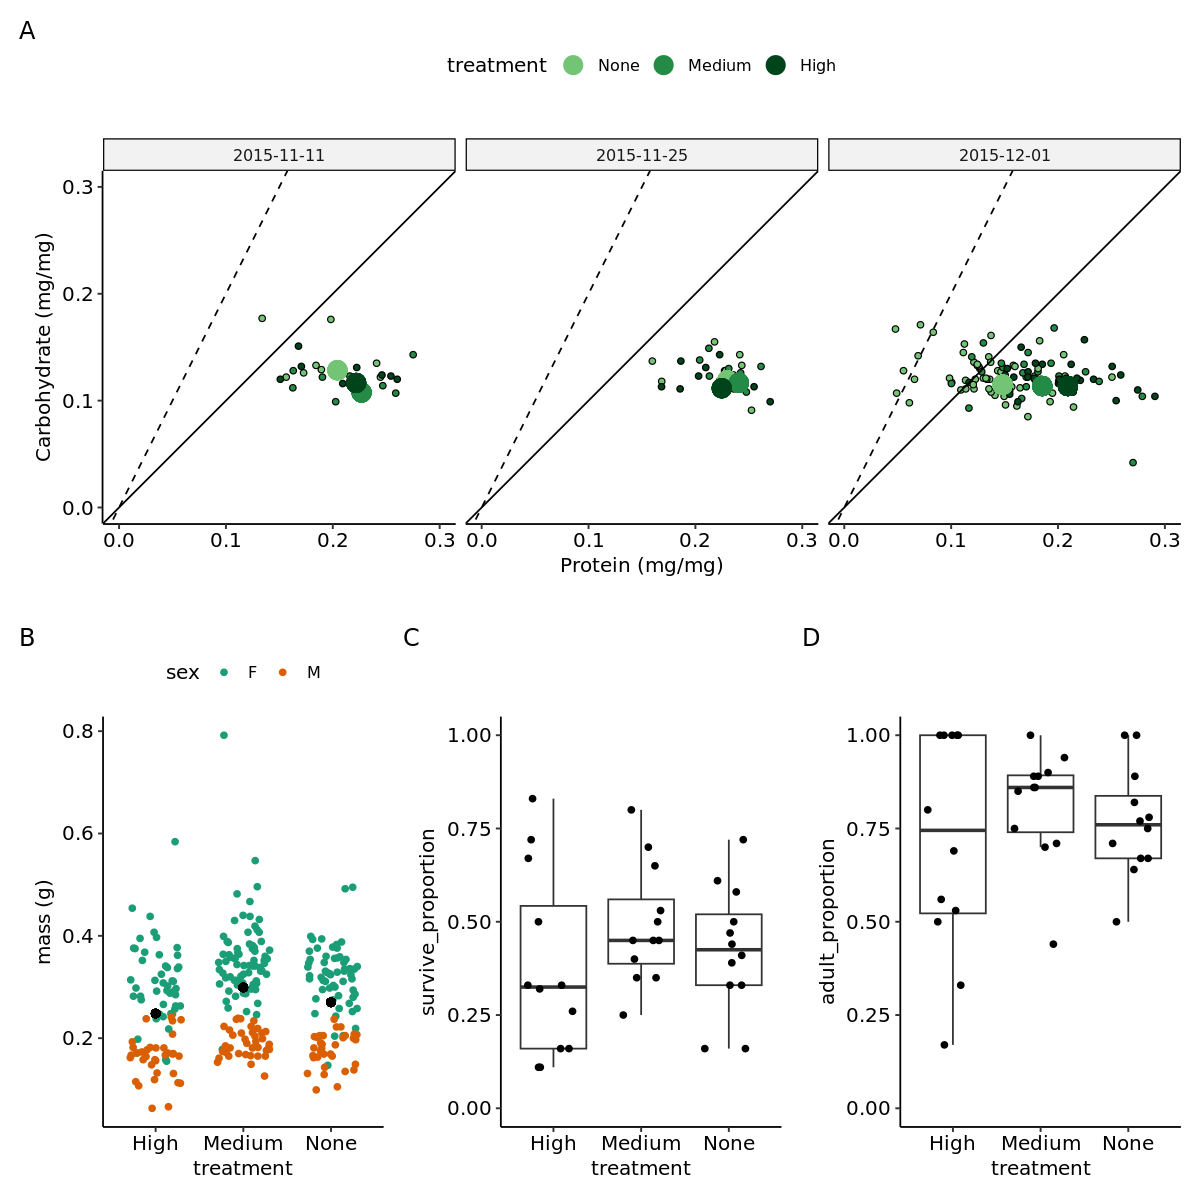

In [54]:
field_cage_plant_locust_figure <- (plant_nutrients_through_time_plot) / (locust_final_mass_plot + survival_prop_figure + adult_prop_figure) + 
  plot_annotation(tag_levels = 'A') 


field_cage_plant_locust_figure

In [55]:
ggsave(field_cage_plant_locust_figure,
       file=here('output/publication_figures/field_cage_plant_locust_figure.png'),
       width=10,height=10)

## Figure - field Cage Locust Nutrient Rebalancing

In [56]:
raw_locust_data <- read_csv(here('data/processed/field_cage_experiment/intake_target_through_time_predictions_raw_data.csv'),show_col_types = FALSE)
locust_model_data <- read_csv(here('data/processed/field_cage_experiment/intake_target_through_time_predictions.csv'),show_col_types = FALSE) |>
    group_by(treatment,interval) 

locust_model_data

raw_locust_data

treatment,interval,pred_carb,pred_protein
<chr>,<dbl>,<dbl>,<dbl>
High,1,0.007140269,4.320264e-04
High,2,0.013823747,9.615916e-04
High,3,0.023173312,3.846809e-03
High,4,0.033107225,7.535505e-03
High,5,0.042146356,1.301377e-02
none,1,0.001038814,-5.581555e-04
none,2,0.007722292,-2.859025e-05
none,3,0.017071858,2.856627e-03
none,4,0.027005771,6.545323e-03


field_plot,field_cage_num,sex,locust_initialmass_g,locusts_final_mass_g,treatment,id,interval,total_c,total_p,cumulative_total_c,cumulative_total_p,day_interval
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C1,5,M,0.167,0.165,none,1,1,0.00000,0.00042,0.00000,0.00042,Day 1
C1,5,M,0.167,0.165,none,1,2,0.00756,0.00000,0.00756,0.00042,Day 2
C1,5,M,0.167,0.165,none,1,3,0.00966,0.00252,0.01722,0.00294,Day 3-4
C1,5,M,0.167,0.165,none,1,4,0.00000,0.00420,0.01722,0.00714,Day 5-6
C1,5,M,0.167,0.165,none,1,5,0.00000,0.00084,0.01722,0.00798,Day 7-9
H1,2,F,0.211,0.328,High,2,1,0.00798,0.00000,0.00798,0.00000,Day 1
H1,2,F,0.211,0.328,High,2,2,0.01050,0.00000,0.01848,0.00000,Day 2
H1,2,F,0.211,0.328,High,2,3,0.03738,0.00882,0.05586,0.00882,Day 3-4
H1,2,F,0.211,0.328,High,2,4,0.02478,0.01512,0.08064,0.02394,Day 5-6


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”


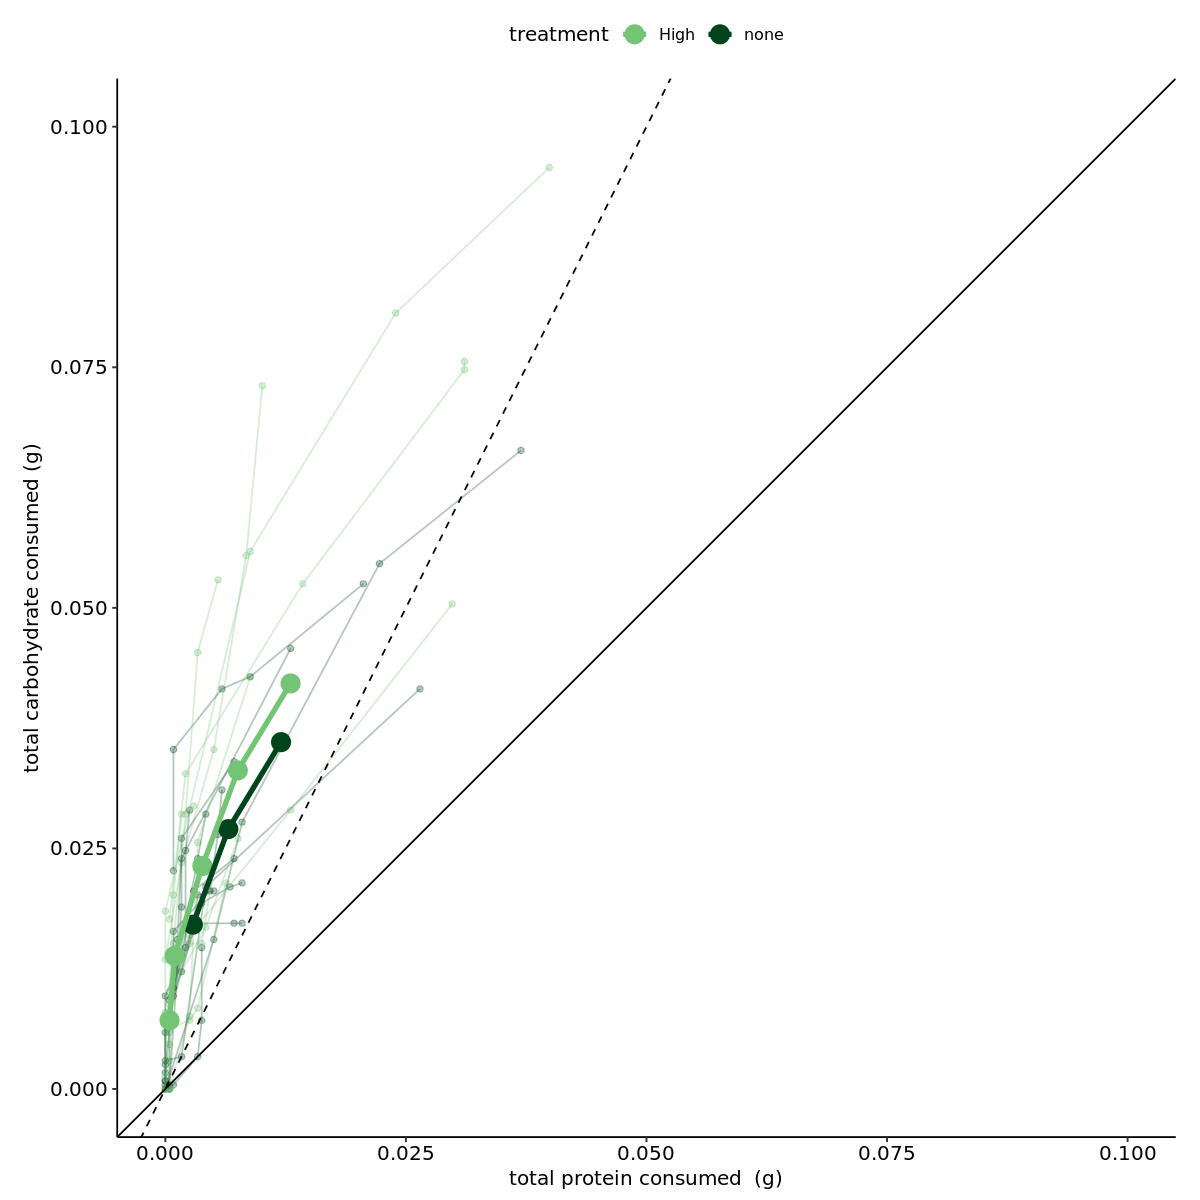

In [59]:
field_cage_locust_intake_rebalance_plot <- raw_locust_data |>
    drop_na() |>
    ggplot(aes(x=cumulative_total_p,y=cumulative_total_c,group=id,color=treatment)) +
        geom_point(alpha=0.3) +
        geom_line(alpha=0.3) +
        geom_point(data = locust_model_data,
                   aes(y = pred_carb, x = pred_protein,
                       group=treatment, color=treatment), size=5) +
        geom_line(data = locust_model_data,
                   aes(y = pred_carb, x = pred_protein,
                       group=treatment, color=treatment),linewidth=1.5) +
        coord_equal(ratio=1) + 
        xlim(0,0.1) + ylim(0,0.1) + 
        theme_pubr() + 
        ylab("total carbohydrate consumed (g)") +
        xlab("total protein consumed  (g)") + 
        geom_abline(slope = 1,linetype=1,intercept=0) + 
        geom_abline(slope = 2,linetype=2,intercept=0) +
        scale_color_manual(values = c('#74c476','#00441b'))

field_cage_locust_intake_rebalance_plot

In [60]:
ggsave(field_cage_locust_intake_rebalance_plot,
       file=here('output/publication_figures/field_cage_locust_intake_target_rebalancing.png'),
       width=5,height=5)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”


## Table - Plant Nutrients through time

In [45]:
mods <- readRDS(here("output/field_cage_experiment/model_objects/plant_nutrient_through_time_models.rds"))

final_mod <- mods$mod1

parametric_terms <- tidy(final_mod,parametric=TRUE) |>
    dplyr::select(term,estimate,std.error,p.value) |>
    rename(variable = term,
           SE = std.error,
           `p-value` = p.value) |>
    mutate(variable = gsub('\\(|\\)|treatment|date|diet','',variable),
          macronutrient = case_when(str_detect(variable,'\\.1') ~ 'protein', TRUE ~ 'carbohydrate'),
          variable = gsub('\\.1','',variable))
nonparametric_terms <- tidy(final_mod,parametric=FALSE)

nonparametric_terms  <- tidy(final_mod,parametric=FALSE) |>
    dplyr::select(term,edf,statistic,p.value) |>
    rename(variable = term,
           EDF = edf,
           `p-value` = p.value) |>
    mutate(macronutrient = case_when(str_detect(variable,'s\\.1') ~ 'protein', TRUE ~ 'carbohydrate'),
          variable = gsub('\\.1','',variable))

field_cage_plant_nutrients_model_results <- bind_rows(parametric_terms,nonparametric_terms)

In [46]:
field_cage_plant_nutrients_model_results |> head(2)

variable,estimate,SE,p-value,macronutrient,EDF,statistic
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Intercept,0.12699385,0.007284922,4.681898e-68,carbohydrate,NA,NA
Medium,-0.02028183,0.007170558,4.676868e-03,carbohydrate,NA,NA


In [47]:
write.csv(field_cage_plant_nutrients_model_results,
          file=here('output/publication_tables/field_cage_plant_nutrients_model_summary.csv'),
          row.names=FALSE)

## Table -  field cage final locust mass 

In [48]:
locust_mass_model <- readRDS(here("output/field_cage_experiment/model_objects/final_locust_weight_by_field_cage_treatment_models.rds"))

In [49]:
parametric_terms <- tidy(locust_mass_model,parametric=TRUE)  |>
    dplyr::select(term,estimate,std.error,p.value) |>
    rename(variable = term,
           SE = std.error,
           `p-value` = p.value) |>
    mutate(variable = gsub('\\(|\\)','',variable),
           variable = gsub('treatment|sex','',variable),
           variable = case_when(variable == 'M' ~ 'male',TRUE ~ variable)) |>
    dplyr::select(variable,estimate,SE,`p-value`)

nonparametric_terms  <- tidy(locust_mass_model,parametric=FALSE) |>
    dplyr::select(term,edf,statistic,p.value) |>
    rename(variable = term,
           EDF = edf,
           `p-value` = p.value)

locust_mass_model_summary <- bind_rows(parametric_terms,nonparametric_terms)

In [50]:
locust_mass_model_summary

variable,estimate,SE,p-value,EDF,statistic
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Intercept,0.32618758,0.007209637,0.000000e+00,NA,NA
male,-0.14769427,0.005506869,1.888448e-158,NA,NA
medium,0.01493507,0.009518326,1.166280e-01,NA,NA
high,-0.01105525,0.010095181,2.734721e-01,NA,NA
"s(carb_mg_mg,protein_mg_mg)",NA,NA,4.164041e-01,0.001665257,0.001606924
s(cage_num),NA,NA,1.783095e-05,17.399298527,42.160313817


In [51]:
write.csv(locust_mass_model_summary,
          file=here('output/publication_tables/field_cage_final_locust_mass_model_summary.csv'),
          row.names=FALSE)

## Table - locust nutrient rebalancing model summary

In [52]:
mods <- readRDS(here("output/field_cage_experiment/model_objects/intake_target_through_time_models.rds"))

locust_rebalance_model <- mods$mod1

In [53]:
summary(locust_rebalance_model)


Family: Multivariate normal 
Link function: 

Formula:
cumulative_total_c ~ sex + interval + treatment + s(id, bs = "re")
cumulative_total_p ~ sex + interval + treatment + s(id, bs = "re")

Parametric coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.0125868  0.0036504   3.448 0.000565 ***
sexM            -0.0108931  0.0041592  -2.619 0.008818 ** 
interval2        0.0066835  0.0025232   2.649 0.008077 ** 
interval3        0.0160330  0.0025232   6.354 2.09e-10 ***
interval4        0.0259670  0.0025232  10.291  < 2e-16 ***
interval5        0.0350061  0.0025232  13.874  < 2e-16 ***
treatmentnone   -0.0061015  0.0040947  -1.490 0.136202    
(Intercept).1    0.0022792  0.0014613   1.560 0.118829    
sexM.1          -0.0036943  0.0014086  -2.623 0.008726 ** 
interval2.1      0.0005296  0.0014992   0.353 0.723909    
interval3.1      0.0034148  0.0014992   2.278 0.022739 *  
interval4.1      0.0071035  0.0014992   4.738 2.16e-06 ***
interval5.1      

In [54]:
parametric <- tidy(locust_rebalance_model,parametric=TRUE) |>
    dplyr::select(term,estimate,std.error,p.value) |>
    rename(variable = term,
           SE = std.error,
           `p-value` = p.value) |>
    mutate(variable = gsub('\\(|\\)','',variable),
           macronutrient = case_when(str_detect(variable,'.1') ~ 'protein', TRUE ~ 'carbohydrate'),
           variable = gsub('.1|treatment|sex|interval|treatment','',variable),
           variable = case_when(variable == '2' ~ 'day 2',
                                variable == '3' ~ 'day 3-4',
                                variable == '4' ~ 'day 5-6',
                                variable == '5' ~ 'day 7-9',
                                variable == 'M' ~ 'male',TRUE ~ variable)) |>
    dplyr::select(macronutrient,variable,estimate,SE,`p-value`)


nonparametric <- tidy(locust_rebalance_model,parametric=FALSE) |>
    rename(variable = term,
           EDF = edf,
           `p-value` = p.value) |>
    mutate(macronutrient = case_when(str_detect(variable,'.1') ~ 'protein', TRUE ~ 'carbohydrate'),
          variable = gsub('\\.|1','',variable)) |>
    dplyr::select(macronutrient,variable,statistic,`p-value`)



locust_mass_model_summary <- bind_rows(parametric,nonparametric)

In [55]:
write.csv(locust_mass_model_summary,
          file=here('output/publication_tables/field_cage_locust_nutrient_rebalancing_model_summary.csv'),
          row.names=FALSE)

# Section 2 -- supplementary figures and tables

## Figure - individual time step instake targets for field cage locusts

In [39]:
raw_locust_data <- read_csv(here('data/processed/field_cage_experiment/intake_target_through_time_predictions_raw_data.csv'),
    show_col_types = FALSE)


locust_model_data <- read_csv(here('data/processed/field_cage_experiment/intake_target_through_time_predictions.csv'),
    show_col_types = FALSE)


raw_locust_data |> head(1)
locust_model_data |> head(1)

field_plot,field_cage_num,sex,locust_initialmass_g,locusts_final_mass_g,treatment,id,interval,total_c,total_p,cumulative_total_c,cumulative_total_p,day_interval
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C1,5,M,0.167,0.165,none,1,1,0,0.00042,0,0.00042,Day 1


treatment,interval,pred_carb,pred_protein
<chr>,<dbl>,<dbl>,<dbl>
High,1,0.007140269,0.0004320264


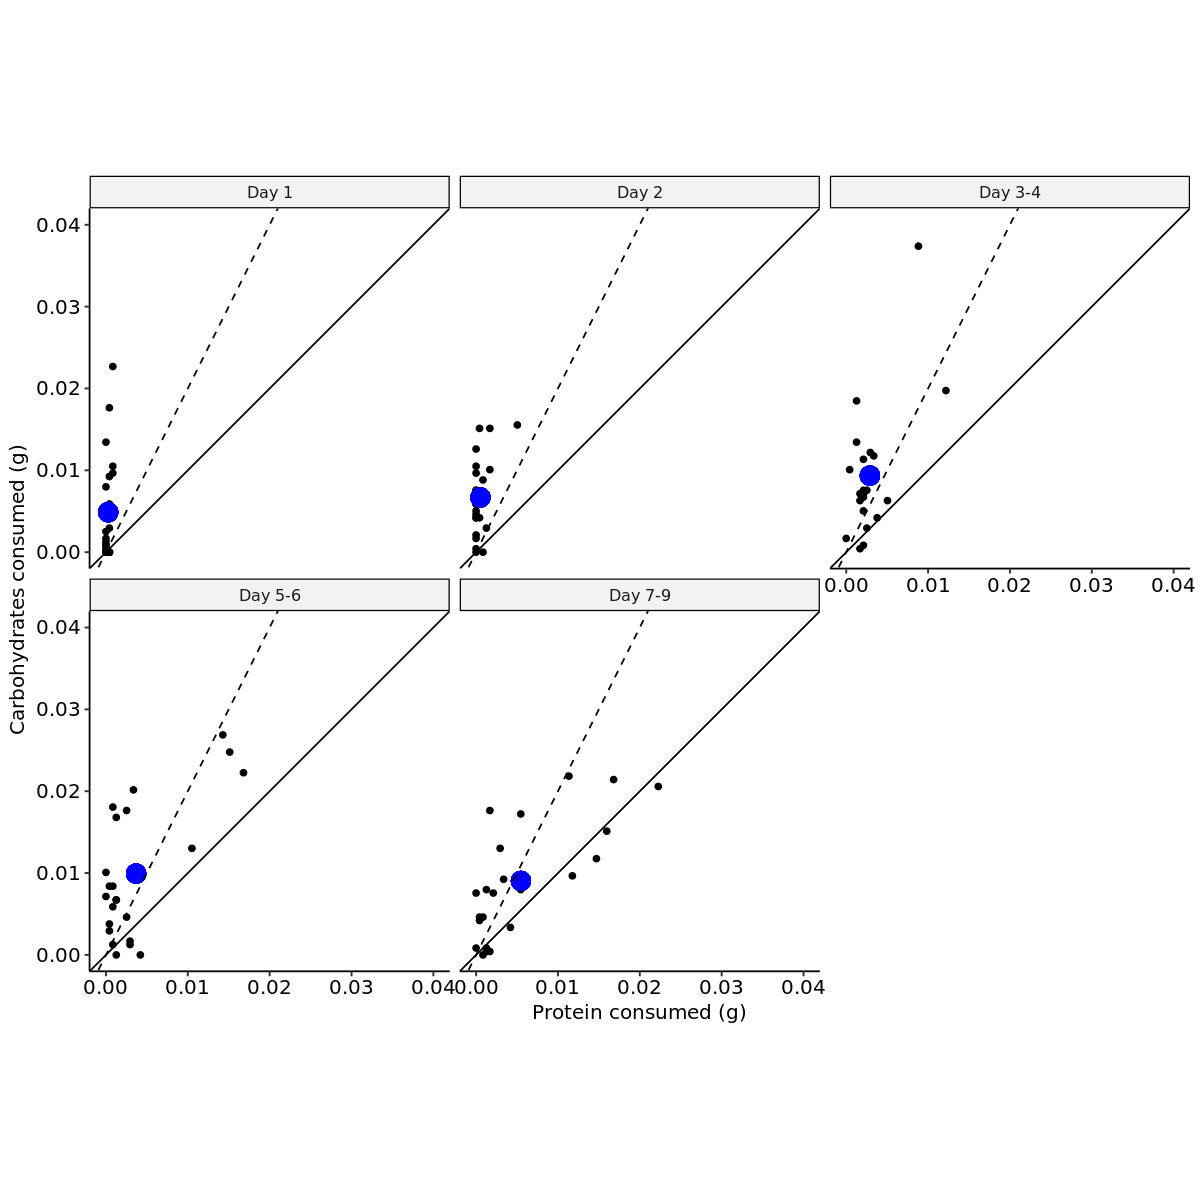

In [40]:
field_cage_locust_intake_rebalance_day_facet_plot <- raw_locust_data |>
    group_by(day_interval) |>
    mutate(mean_carb = mean(total_c),mean_protein = mean(total_p)) |>
    ggplot(aes(x=total_p,y=total_c)) +
        geom_point(color='black') +
        geom_point(aes(x=mean_protein,y=mean_carb),size=5,color='blue') +
        coord_equal(ratio=1) + 
        xlab("Protein consumed (g)") + 
        ylab("Carbohydrates consumed (g)") + 
        theme_pubr() +
        geom_abline(slope = 1,linetype=1) + 
        geom_abline(slope = 2,linetype=2) + 
        facet_wrap(~day_interval) + 
        xlim(0,0.04) +
        ylim(0,0.04)

field_cage_locust_intake_rebalance_day_facet_plot

In [42]:
ggsave(field_cage_locust_intake_rebalance_day_facet_plot,
       file=here('output/publication_figures/field_cage_locust_intake_rebalance_day_facet_plot.png'),
       width=15,height=10)

## Figure - field cage soil N content by treatment and plant carbohydrate and protein

We need to regress soil and plant nutrients together

- panel a: initial no3 to treatment
- panel b: initial no4 to treatment
- panel c: plant protein to no3
- panel d: plant protein to no4
- panel e: plant carbohydrate to no3
- panel f: plant carbohydrate to no4


In [7]:
soil_plant <- read_csv(here('data/processed/field_cage_experiment/plant_soil_nutrient_data.csv'))
soil_dat <- read_csv(here('data/processed/field_cage_experiment/soil_nutrient_data'))

Rows: 168 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): plot, treatment
dbl  (4): protein_mg_mg, carb_mg_mg, mean_no3, mean_no4
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 36 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): treatment
dbl (2): initial_no3, initial_no4

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [33]:
panel_a <- soil_dat |>
    mutate(treatment = factor(treatment,levels=c('None','Medium','High'))) |>
    ggplot(aes(x=treatment,y=initial_no4)) +
        geom_boxplot() +
        geom_jitter(width=0.25) +
        xlab('') +
        ylab('Initial Soil NO4') +
        theme_pubr()

panel_b <- soil_dat |>
    mutate(treatment = factor(treatment,levels=c('None','Medium','High'))) |>
    ggplot(aes(x=treatment,y=initial_no3)) +
        geom_boxplot() +
        geom_jitter(width=0.25) +
        xlab('') +
        ylab('Initial Soil NO3') +
        theme_pubr()

panel_c <- soil_plant |>
    ggplot(aes(x=mean_no3,y=protein_mg_mg)) +
        geom_point() +
        geom_smooth(method='lm',se=FALSE,color='red',size=1.3)  +
        xlab('Initial Soil NO3') +
        ylab('Protein mg/mg') +
        theme_pubr()

panel_d <- soil_plant |>
    ggplot(aes(x=mean_no4,y=protein_mg_mg)) +
        geom_point() +
        geom_smooth(method='lm',se=FALSE,color='red',size=1.3)  +
        xlab('Initial Soil NO4') +
        ylab('Protein mg/mg') +
        theme_pubr()

panel_e <- soil_plant |>
    ggplot(aes(x=mean_no3,y=carb_mg_mg)) +
        geom_point() +
        geom_smooth(method='lm',se=FALSE,color='red',size=1.3)  +
        xlab('Initial Soil NO3') +
        ylab('Carbohydrate mg/mg') +
        theme_pubr()

panel_f <- soil_plant |>
    ggplot(aes(x=mean_no4,y=protein_mg_mg)) +
        geom_point() +
        geom_smooth(method='lm',se=FALSE,color='red',size=1.3)  +
        xlab('Initial Soil NO4') +
        ylab('Protein mg/mg') +
        theme_pubr()




layout <- "
AB
CD
EF
"

plant_and_soil_nutrients <- panel_a + panel_b + panel_d + panel_c + panel_f + panel_e +
  plot_layout(design = layout)


In [34]:
ggsave(plant_and_soil_nutrients,
       file=here('output/publication_figures/field_cage_plant_and_soil_nutrient_correlations.png'),
       width=10,height=15)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


## table - plant species nutrient content

In [43]:
dat <- read_csv(here('data/processed/field_cage_experiment/plant_species_soil_nutrient_by_treatment.csv'),show_col_types = FALSE)



In [44]:
write.csv(dat,
          file=here('output/publication_tables/field_cage_plant_species_nutrient_content.csv'),
          row.names=FALSE)

## table -- plant species ground cover

In [46]:
dat <- read_csv(here('data/processed/field_cage_experiment/plant_ground_cover_by_treatment.csv'),show_col_types = FALSE)
dat

treatment,plant_cover,Urochloa panicoides,Enteropogon acicularis,Austrodanthonia caespitosa,Cyperus rotundus,stipa species
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,27.38095,47.50000,67.38095,15.23810,15.00000,0
Medium,35.23810,15.00000,65.47619,18.33333,17.29167,5
None,35.47619,13.33333,60.11905,15.35714,19.33333,0


In [47]:
write.csv(dat,
          file=here('output/publication_tables/field_cage_plant_ground_cover.csv'),
          row.names=FALSE)